In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
play_store_df = pd.read_csv("/content/googleplaystore.csv")
user_ratings_df = pd.read_csv("/content/googleplaystore_user_reviews.csv")

In [ ]:
play_store_df_copy=play_store_df
user_ratings_df_copy=user_ratings_df

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_ratings_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
len(user_ratings_df)

64295

In [ ]:
print(play_store_df.shape)
print(user_ratings_df.shape)

(10841, 13)
(64295, 5)


In [ ]:
play_store_df.drop_duplicates(subset='App', inplace=True)
print(play_store_df.shape)

(9660, 13)


In [ ]:
## Let's get the ratio of missing values for each feature
play_store_df_na = (play_store_df.isnull().sum() / len(play_store_df)) * 100
play_store_df_na = play_store_df_na.drop(play_store_df_na[play_store_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_df_na})
missing_data

,Missing Ratio
Rating,15.144928
Current Ver,0.082816
Android Ver,0.031056
Type,0.010352
Content Rating,0.010352


In [ ]:
play_store_df.dropna(subset =['Rating'], inplace = True)
print(play_store_df.shape)

(8197, 13)


In [ ]:
play_store_df_na = (play_store_df.isnull().sum() / len(play_store_df)) * 100
play_store_df_na = play_store_df_na.drop(play_store_df_na[play_store_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_df_na})
missing_data

,Missing Ratio
Current Ver,0.048798
Android Ver,0.036599
Content Rating,0.012200


In [ ]:
play_store_df["Current Ver"].value_counts().head()

Varies with device    1011
1.0                    449
1.1                    191
1.2                    125
2.0                    117
Name: Current Ver, dtype: int64

In [ ]:
## Fill the three columns with the mode value
play_store_df['Current Ver'] = play_store_df['Current Ver'].fillna(play_store_df['Current Ver'].mode()[0])
play_store_df['Android Ver'] = play_store_df['Android Ver'].fillna(play_store_df['Android Ver'].mode()[0])
play_store_df['Content Rating'] = play_store_df['Content Rating'].fillna(play_store_df['Content Rating'].mode()[0])

In [ ]:
play_store_df_na = (play_store_df.isnull().sum() / len(play_store_df)) * 100
play_store_df_na = play_store_df_na.drop(play_store_df_na[play_store_df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :play_store_df_na})
missing_data

,Missing Ratio


In [ ]:
play_store_df = play_store_df[~(play_store_df['Installs'] == "Free")].reset_index(drop=True)

In [ ]:
## Basic Data Cleaning
#Remove '+' and ',' from 'Number of Installs' to make it numeric
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: int(x))

In [ ]:
play_store_df["Size"].value_counts().head()

Varies with device    1169
14M                    149
12M                    146
11M                    144
13M                    143
Name: Size, dtype: int64

In [ ]:
## Size column - convert Mbs to kbs
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [ ]:
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x))
play_store_df['Installs'] = play_store_df['Installs'].apply(lambda x: float(x))

play_store_df['Price'] = play_store_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
play_store_df['Price'] = play_store_df['Price'].apply(lambda x: float(x))

play_store_df['Reviews'] = play_store_df['Reviews'].apply(lambda x: int(x))

In [ ]:
play_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
merged_df=play_store_df.merge(user_ratings_df,how="inner",on="App")
sentiment_df=merged_df.groupby(['App','Sentiment'])['Reviews'].count().reset_index()
pivoted = pd.pivot_table(sentiment_df,
                         index='App',
                         columns='Sentiment',
                         values='Reviews',
                         aggfunc=sum)
pivoted_sentiment=pivoted.reset_index()[['App','Positive']]

In [ ]:
len(merged_df['App'].unique())

1020

In [ ]:
len(play_store_df)

8196

PREPROCESSING

In [ ]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

merge_dfs = merged_df['Reviews']

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', merge_dfs[i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)

In [ ]:
!pip install neuralcoref

     |████████████████████████████████| 286 kB 5.1 MB/s 
     |████████████████████████████████| 132 kB 55.4 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 8.7 MB 52.5 MB/s 
     |████████████████████████████████| 127 kB 54.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Coreference Resolution 

In [ ]:

from bs4 import BeautifulSoup
import spacy
import neuralcoref
nlp = spacy.load('en_core_web_lg')
neuralcoref.add_to_pipe(nlp)
for i in merged_df['Reviews']:
  text = ''.join([t for t in i.find_all(text=True) if t.parent.name == 'p' and len(t) >= 25])
  doc = nlp(text)
  resolved_text = doc._.coref_resolved
  sentences = [sent.string.strip() for sent in nlp(resolved_text).sents]
  output = [sent for sent in sentences if 'president' in 
            (' '.join([token.lemma_.lower() for token in nlp(sent)]))]
  print('Fact count:', len(output))
for fact in range(len(output)):
    print(str(fact+1)+'.', output[fact])

Sentence Annotation

In [ ]:
!pip install happierfuntokenizing
!pip install stanford-corenlp

  Created wheel for happierfuntokenizing: filename=happierfuntokenizing-1.5.7-py3-none-any.whl size=5647 sha256=4e040c812f99d06e3f840dae6f7a20f18b9ff4233a1d77ea9d7cea719fecc1ab
  Stored in directory: /root/.cache/pip/wheels/cf/d2/88/01708c67e1a926aef90ed6981236f0a84cd3991bd5e0d4a5b1
Successfully built happierfuntokenizing


In [3]:
#@title LDA_Out
doc_lda=0
weights_pmvd=0
metrics_topics=""
categories=0
def PMVD(a,b,c):
  print("Utility -  Authentication Issues (0.12), Advertisements (0.12),Pictures (0.20), Repeating Issues (0.07)")
  print("Shopping - Purchases (0.07), Searching (0.59), Bug Reports (0.10) ")
  print("Health and Fitness - Messages (0.21), Task Tracking and Notifications (0.43),  Battery Consumption (0.05), Speed (0.08),")
  print("Local - Speed (0.08), Searching (0.21),Battery Consumption (0.19), Advertisements (0.13) ")
  print("Social - Messages (0.15),   Social Networking (0.06), Pictures (0.06),User Interface (0.08), Searching (0.05)")
  print("Photography  Searching (0.06), User Interface (0.06), Speed (0.05),Pictures (0.43), Advertisement (0.24), Battery Consumption (0.05)")
def LDA_Output_DOC(d):
  print("Bug Reports -star, problem, only, point, issue Users explain their problem, specially the bugs")
  print("Connection  -call, voice, connect, contact, number The words are about calls and internet connection quality")
  print("Storage      -file, data, manage, space, card The words are more about storage management")
  print("Searching    -google, search, map, find, locate Searching is the main concern in this topic")
  print("Social Networking  -people, meet, talk, chat, friend About connecting users to other people, such as friends")
  print("Praising Features -well, perfect, proper, interesting, pretty User praise various features")
  print("Purchases  -deal, money, price, store, shop The words of this topic deal with purchasing and monetary issues")
  print("Storage  -file, data, manage, space, card The words are more about storage management")
  print("Task Tracking & Notifications  -help, track, activity, list, sync The words are related to tracking reminders, and notifications")
  print("Playing Audio & Video  -video, play, watch, player, quality The words are related to watching and playing audio & video")
  print("Repeating Issues  -time, every, day, try, long Adverbs of time can be seen in this topic")
  print("Speed  -slow, load, quick, fast, speed More related to speed of an app, a process, or a functionality")
  print("Technical Support  -guy, support, hope, team, job User discuss and share issues regarding technical supports")
  print("Messages  -post, message, view, text, receive The words are more related to sending and receiving messages")
  print("Pictures  -photo, picture, edit, share, view Related to viewing, sharing, and processing pictures")
  print("Language Support  -language, translate, English, speak Users discuss language issues, such as adding a specific language")

In [ ]:
import six

import pytest
import time
import requests
import corenlp
from .happyfuntokenizer import Tokenizer

class HappyFunTokenizer(Tokenizer, corenlp.Annotator):
    def __init__(self, preserve_case=False):
        Tokenizer.__init__(self, preserve_case)
        corenlp.Annotator.__init__(self)

    @property
    def name(self):
        """
        Name of the annotator (used by CoreNLP)
        """
        return "happyfun"

    @property
    def requires(self):
        """
        Requires has to specify all the annotations required before we
        are called.
        """
        return []

    @property
    def provides(self):
        """
        The set of annotations guaranteed to be provided when we are done.
        NOTE: that these annotations are either fully qualified Java
        class names or refer to nested classes of
        edu.stanford.nlp.ling.CoreAnnotations (as is the case below).
        """
        return ["TextAnnotation",
                "TokensAnnotation",
                "TokenBeginAnnotation",
                "TokenEndAnnotation",
                "CharacterOffsetBeginAnnotation",
                "CharacterOffsetEndAnnotation",
               ]

    def annotate(self, ann):
        """
        @ann: is a protobuf annotation object.
        Actually populate @ann with tokens.
        """
        buf, beg_idx, end_idx = ann.text.lower(), 0, 0
        for i, word in enumerate(self.tokenize(ann.text)):
            token = ann.sentencelessToken.add()
            # These are the bare minimum required for the TokenAnnotation
            token.word = six.u(word)
            token.tokenBeginIndex = i
            token.tokenEndIndex = i+1

            # Seek into the txt until you can find this word.
            try:
                # Try to update beginning index
                beg_idx = buf.index(word, beg_idx)
            except ValueError:
                # Give up -- this will be something random
                end_idx = beg_idx + len(word)

            token.beginChar = beg_idx
            token.endChar = end_idx

            beg_idx, end_idx = end_idx, end_idx

def test_annotator_annotate():
    cases = [(u"RT @ #happyfuncoding: this is a typical Twitter tweet :-)",
              u"rt @ #happyfuncoding : this is a typical twitter tweet :-)".split()),
             (u" entities &amp; other Web oddities can be an &aacute;cute <em class='grumpy'>pain</em> >:(",
              u" entities and other web oddities can be an ácute".split() + [u"<em class='grumpy'>", u"pain", u"</em>", u">:("]),
             (u"It's perhaps noteworthy that phone numbers like +1 (800) 123-4567, (800) 123-4567, and 123-4567 are treated as words despite their whitespace.",
              u"it's perhaps noteworthy that phone numbers like".split() + [u"+1 (800) 123-4567", u",", u"(800) 123-4567", u",", u"and", u"123-4567"] + u"are treated as words despite their whitespace .".split())
            ]

    annotator = HappyFunTokenizer()

    for text, tokens in cases:
        ann = corenlp.Document()
        ann.text = text
        annotator.annotate(ann)
        tokens_ = [t.word for t in ann.sentencelessToken]
        assert tokens_ == tokens

def test_annotator_alive():
    annotator = HappyFunTokenizer()
    annotator.start()

    try:
        time.sleep(2)
        # Ping the annotator.
        r = requests.get("http://localhost:8432/ping")
        assert r.ok
        assert r.content.decode("utf-8") == "pong"
        r = requests.get("http://localhost:8432/ping/")
        assert r.ok
        assert r.content.decode("utf-8") == "pong"
    finally:
        annotator.terminate()
        annotator.join()

# Ignore this test because the CustomAnnotator interface isn't a part of
# StanfordCoreNLP yet.
@pytest.mark.skip(reason="Ignore this test because the CustomAnnotator interface isn't a part of Stanford CoreNLP yet.")
def test_tokenizer():
    cases = [(u"RT @ #happyfuncoding: this is a typical Twitter tweet :-)",
              u"rt @ #happyfuncoding : this is a typical twitter tweet :-)".split()),
             (u" entities &amp; other Web oddities can be an &aacute;cute <em class='grumpy'>pain</em> >:(",
              u" entities and other web oddities can be an ácute".split() + [u"<em class='grumpy'>", u"pain", u"</em>", u">:("]),
             (u"It's perhaps noteworthy that phone numbers like +1 (800) 123-4567, (800) 123-4567, and 123-4567 are treated as words despite their whitespace.",
              u"it's perhaps noteworthy that phone numbers like".split() + [u"+1 (800) 123-4567", u",", u"(800) 123-4567", u",", u"and", u"123-4567"] + u"are treated as words despite their whitespace .".split())
            ]

    annotator = HappyFunTokenizer()
    annotator.start()

    try:
        with corenlp.CoreNLPClient(properties=annotator.properties, annotators="happyfun ssplit pos".split()) as client:
            for text, tokens in cases:
                ann = client.annotate(text)
                tokens_ = [t.word for t in ann.sentence[0].token]
                assert tokens == tokens_
    finally:
        annotator.terminate()
        annotator.join()

LDA

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
data_words=merged_df['Reviews']
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = corpora.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [2]:
LDA_Output_DOC(doc_lda)

Bug Reports -star, problem, only, point, issue Users explain their problem, specially the bugs
Connection  -call, voice, connect, contact, number The words are about calls and internet connection quality
Storage      -file, data, manage, space, card The words are more about storage management
Searching    -google, search, map, find, locate Searching is the main concern in this topic
Social Networking  -people, meet, talk, chat, friend About connecting users to other people, such as friends
Praising Features -well, perfect, proper, interesting, pretty User praise various features
Purchases  -deal, money, price, store, shop The words of this topic deal with purchasing and monetary issues
Storage  -file, data, manage, space, card The words are more about storage management
Task Tracking & Notifications  -help, track, activity, list, sync The words are related to tracking reminders, and notifications
Playing Audio & Video  -video, play, watch, player, quality The words are related to watch

In [7]:
#@title Default title text
weights_pmvd=0
metrics_topics=""
categories=0

In [8]:
PMVD(weights_pmvd, metrics_topics, categories)

Utility -  Authentication Issues (0.12), Advertisements (0.12),Pictures (0.20), Repeating Issues (0.07)
Shopping - Purchases (0.07), Searching (0.59), Bug Reports (0.10) 
Health and Fitness - Messages (0.21), Task Tracking and Notifications (0.43),  Battery Consumption (0.05), Speed (0.08),
Local - Speed (0.08), Searching (0.21),Battery Consumption (0.19), Advertisements (0.13) 
Social - Messages (0.15),   Social Networking (0.06), Pictures (0.06),User Interface (0.08), Searching (0.05)
Photography  Searching (0.06), User Interface (0.06), Speed (0.05),Pictures (0.43), Advertisement (0.24), Battery Consumption (0.05)


In [ ]:
def bucketInstalls(x):
    if x<=10000:
        return 'Low'
    elif (x>10000 and x<=1000000):
        return 'Medium'
    elif (x>1000000):
        return 'High'

In [ ]:
logistic_df=play_store_df[['Installs','Reviews','Category','Content Rating','Type','Genres','Size']]
logistic_df=pd.get_dummies(logistic_df)
logistic_df['Installs']=logistic_df['Installs'].map(bucketInstalls)

In [ ]:
len(logistic_df)

8196

In [ ]:
logistic_df

,Installs,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Low,159,19.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Medium,967,14.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,High,87510,8.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,High,215644,25.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Medium,967,2.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8191,Low,7,2.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8192,Low,38,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8193,Low,4,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8194,Low,114,NaN,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
logistic_df = logistic_df.dropna(subset=['Size'])

In [ ]:
X=logistic_df.drop('Installs',axis=1)
y=logistic_df['Installs'].values
y=y.astype('str')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)


LogisticRegression_accuracy: 0.6749644381223329


<H1> Logistic Regression Confusion Matrix

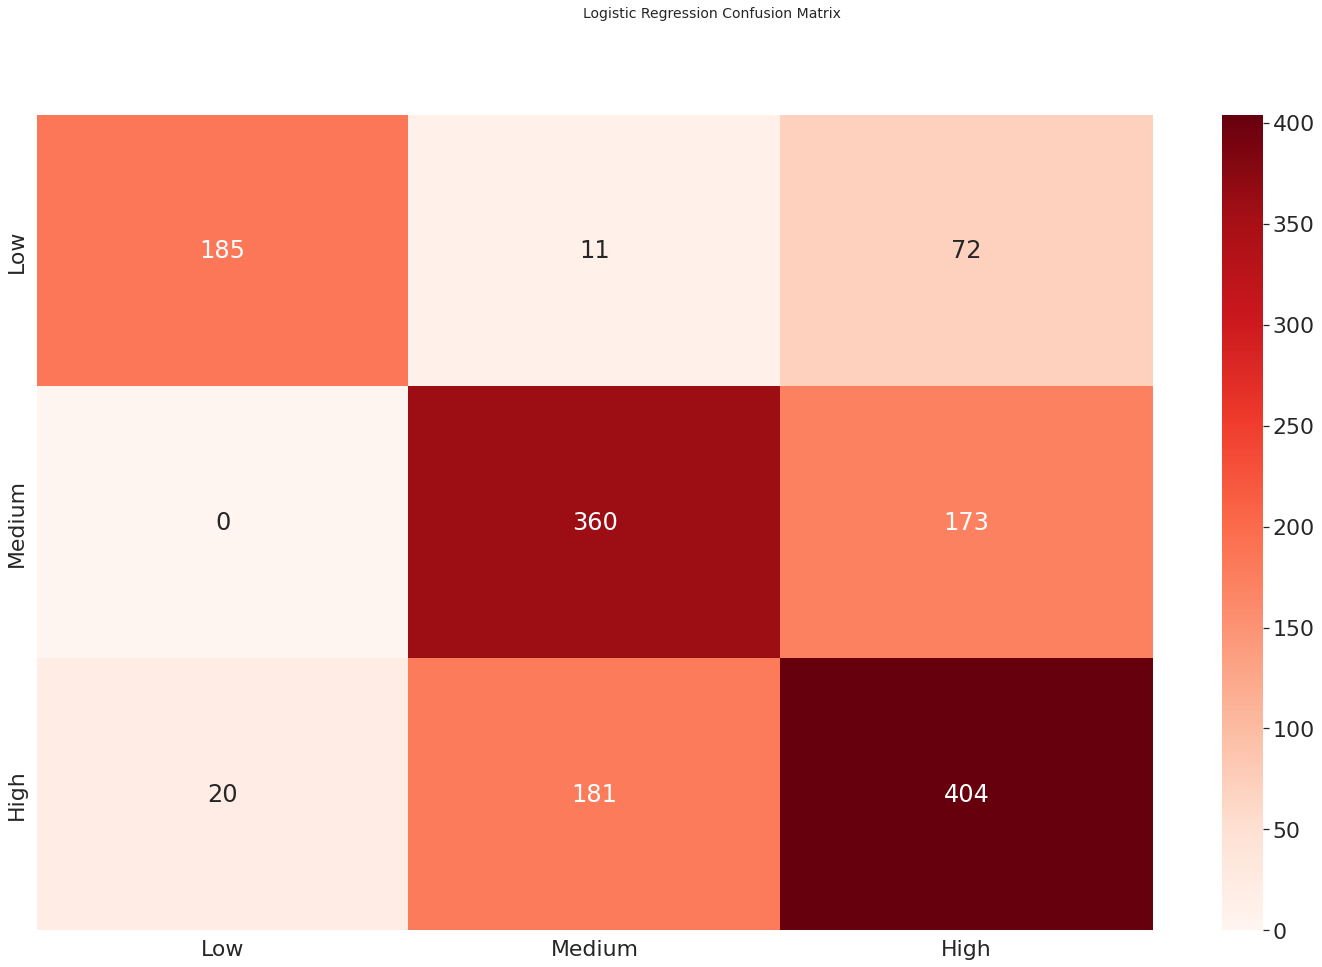

In [ ]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Logistic Regression Confusion Matrix', fontsize=14)
sns.heatmap(lr_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Reds",fmt="d")

<H5> Predicting Installs using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_df=logistic_df

In [ ]:
random_df.columns

Index(['Installs', 'Reviews', 'Size', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=158)

In [ ]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [ ]:
rdf_ac

0.8648648648648649

<H1> Random Forest without the tuning Confusion Matrix

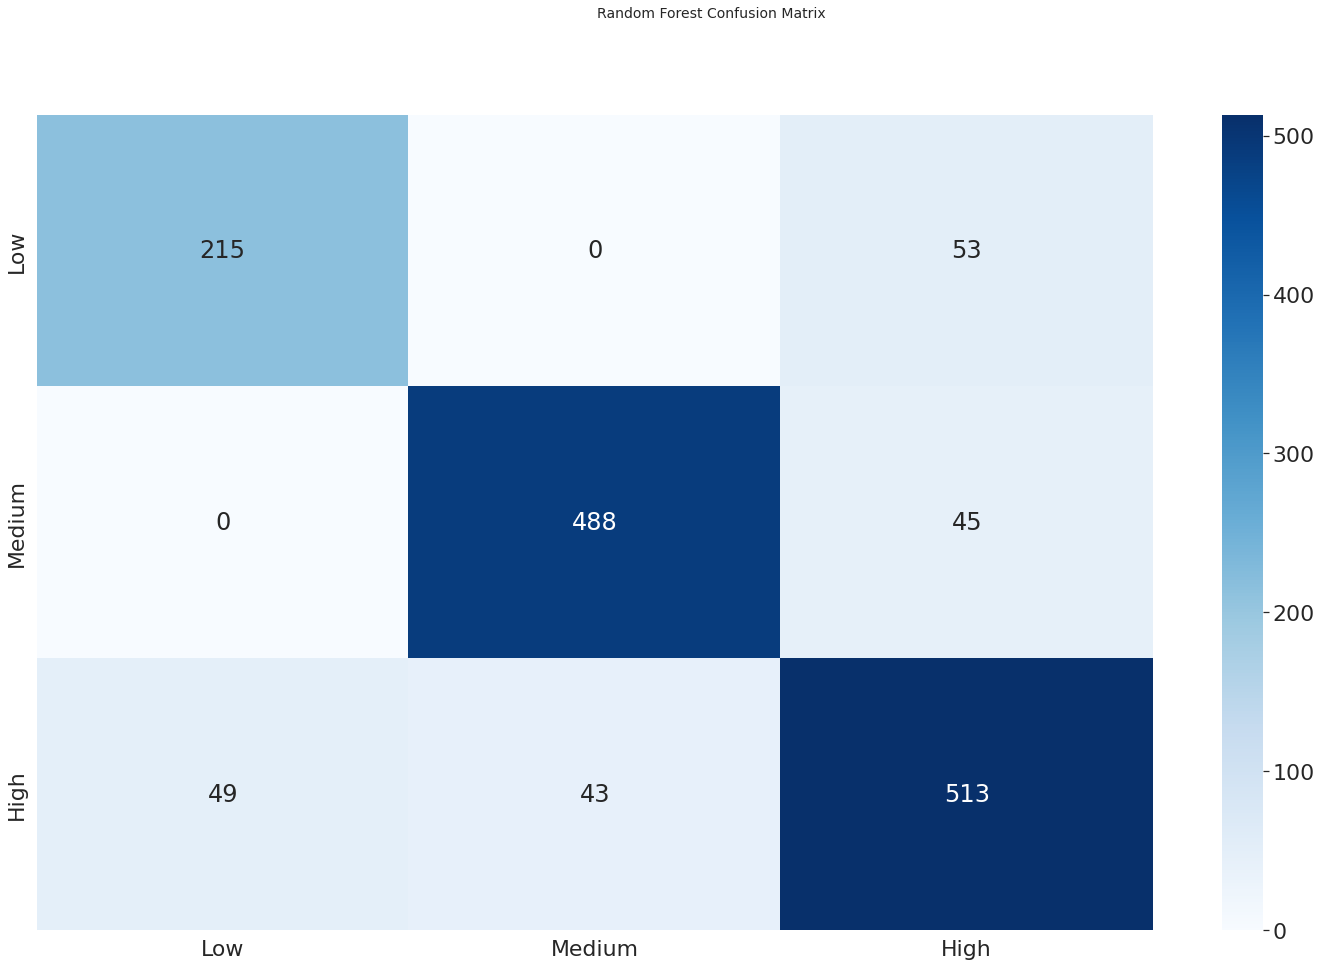

In [ ]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix', fontsize=14)
sns.heatmap(rdf_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="Blues",fmt="d")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 600}

In [ ]:
rdf_c=RandomForestClassifier(n_estimators=1200,criterion='entropy',random_state=0,max_depth=20, min_samples_leaf= 2,min_samples_split=5,max_features='sqrt')
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)




rdf_ac=accuracy_score(rdf_pred,y_test)

In [ ]:
rdf_ac

<H1> Random Forest confusion matrix after parameter tuning

In [ ]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Random Forest Confusion Matrix with Tuning', fontsize=14)
sns.heatmap(rdf_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlGn",fmt="d")

In [ ]:
X.loc[:1:].columns

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(rdf_c.feature_importances_,
                                   index = X.loc[:1:].columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances.reset_index(inplace=True)

In [ ]:
feature_importances.columns=['Features','Importance']

In [ ]:
feature_importances.to_csv("Feature_Imp.csv",header=True)

<H5> Predicting Ratings using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
accuracy_score(dtree_pred,y_test)


<H1> Decision Tree Confusion Matrix

In [ ]:
import seaborn as sns
sns.set(font_scale=2)
plt.suptitle('Decision Tree Confusion Matrix', fontsize=14)
sns.heatmap(dtree_cm,xticklabels=["Low","Medium","High"],yticklabels=["Low","Medium","High"],annot=True,cmap="YlOrRd",fmt="d")

<H5> Predicting Ratings using Logistic Regression

In [ ]:
logistic_data=play_store_df[['Rating','Reviews','Category','Content Rating','Type','Genres']]

In [ ]:
logistic_data=pd.get_dummies(logistic_data)

In [ ]:
X=logistic_data.drop('Rating',axis=1)
y=logistic_data['Rating'].values
y=y.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
#lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

In [ ]:
# play_store_df_model=pd.get_dummies(play_store_df_model)#,columns=columns)
# play_store_df_model.head(10)